In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as pyplot
import seaborn as sns
import numpy as np
import datetime

In [2]:
df=pd.read_csv("C:/Users/JAYANK/Desktop/aspiration ai internship/week2.csv")

In [3]:
sns.set(rc={'figure.figsize':(20,10)})
df.set_index('Date',inplace=True,drop=False)
df['Trend']=df['Trend'].replace({'NAN':'Bull run'})

In [182]:
df.head()

,Unnamed: 0,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,...,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,month,year,Closeprice*TotalTradedQuantity,Day_perc_change,Trend
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-15,0,TCS,EQ,2017-05-15,2360.65,2375.1,2377.95,2341.60,2368.00,2365.10,...,908802,2.138043e+09,30047,712450,78.39,5,2017,2.149408e+09,0.000000,Slight or No change
2017-05-16,1,TCS,EQ,2017-05-16,2365.10,2380.0,2435.00,2373.45,2425.10,2429.15,...,1800513,4.339703e+09,58476,1167534,64.84,5,2017,4.373716e+09,2.708131,positive
2017-05-17,2,TCS,EQ,2017-05-17,2429.15,2433.5,2460.75,2423.00,2450.00,2455.35,...,1438099,3.513729e+09,86412,1031752,71.74,5,2017,3.531036e+09,1.078567,positive
2017-05-18,3,TCS,EQ,2017-05-18,2455.35,2450.0,2572.00,2442.25,2525.00,2536.20,...,2569297,6.489478e+09,111566,1135613,44.20,5,2017,6.516251e+09,3.292810,Among top gainers
2017-05-19,4,TCS,EQ,2017-05-19,2536.20,2536.2,2540.55,2486.00,2503.85,2507.15,...,893022,2.238430e+09,63112,517461,57.94,5,2017,2.238940e+09,-1.145414,negative


In [4]:
df['Date']=df['Date'].astype('datetime64')

In [5]:
df['Date'].dtypes

dtype('<M8[ns]')

In [6]:
df1=df['Close Price'].groupby('Date').last().to_frame()

In [7]:
# add new column to the existing index date
df1['Date']=df1.index

In [8]:
df1

,Close Price,Date
Date,,
2017-05-15,2365.10,2017-05-15
2017-05-16,2429.15,2017-05-16
2017-05-17,2455.35,2017-05-17
2017-05-18,2536.20,2017-05-18
2017-05-19,2507.15,2017-05-19
...,...,...
2019-05-07,2151.95,2019-05-07
2019-05-08,2152.85,2019-05-08
2019-05-09,2172.55,2019-05-09


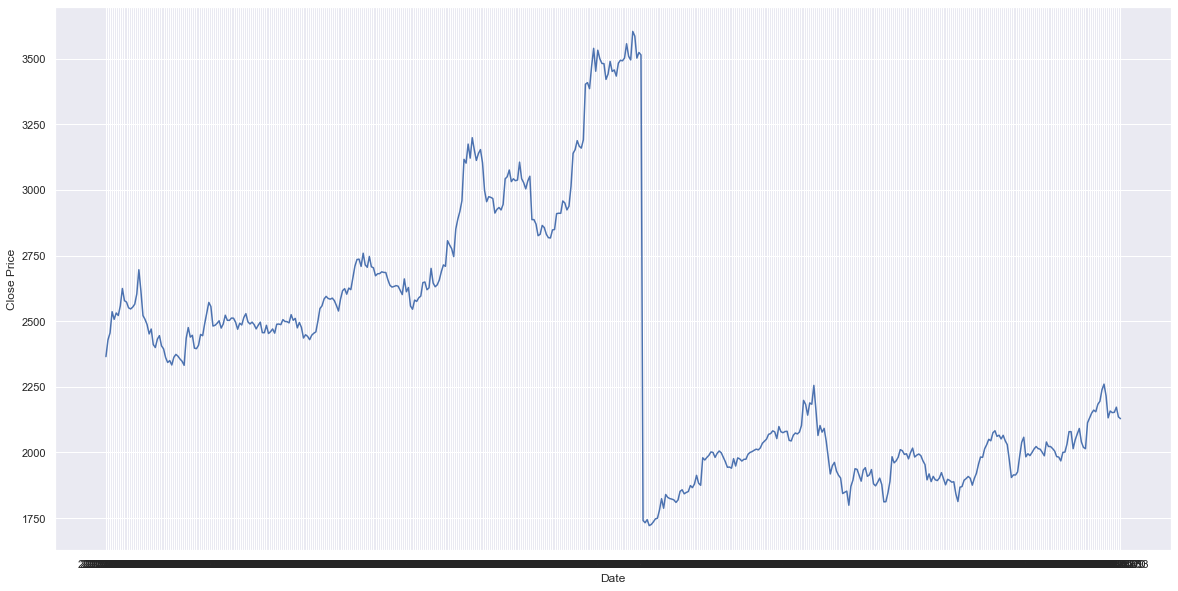

In [9]:
sns.lineplot(x="Date", y="Close Price", data=df1)

<StemContainer object of 3 artists>

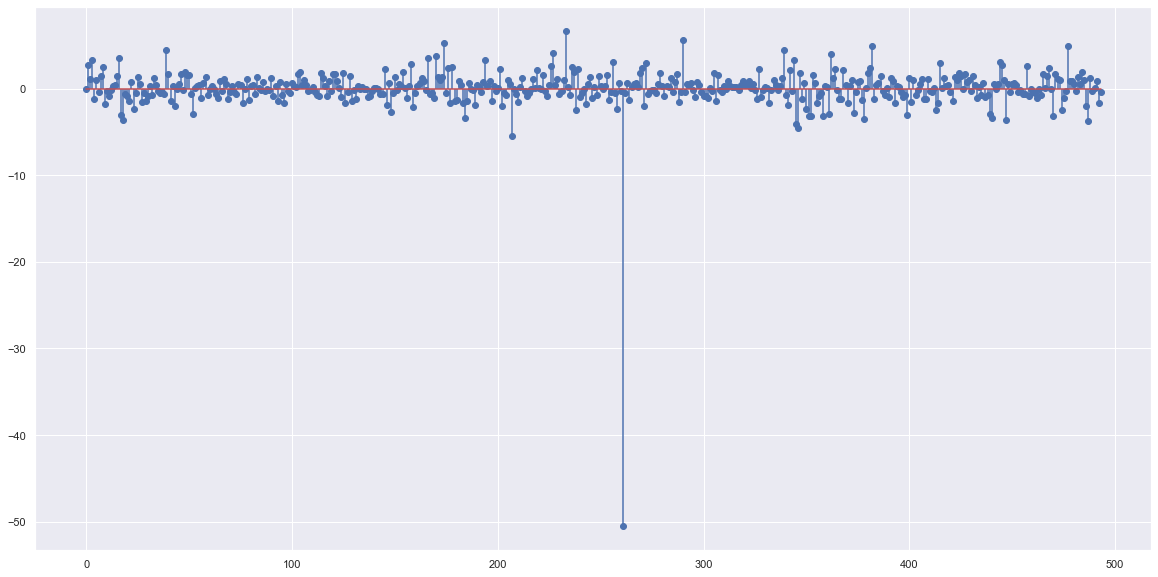

In [10]:
pyplot.stem(df['Day_perc_change'],use_line_collection=True)

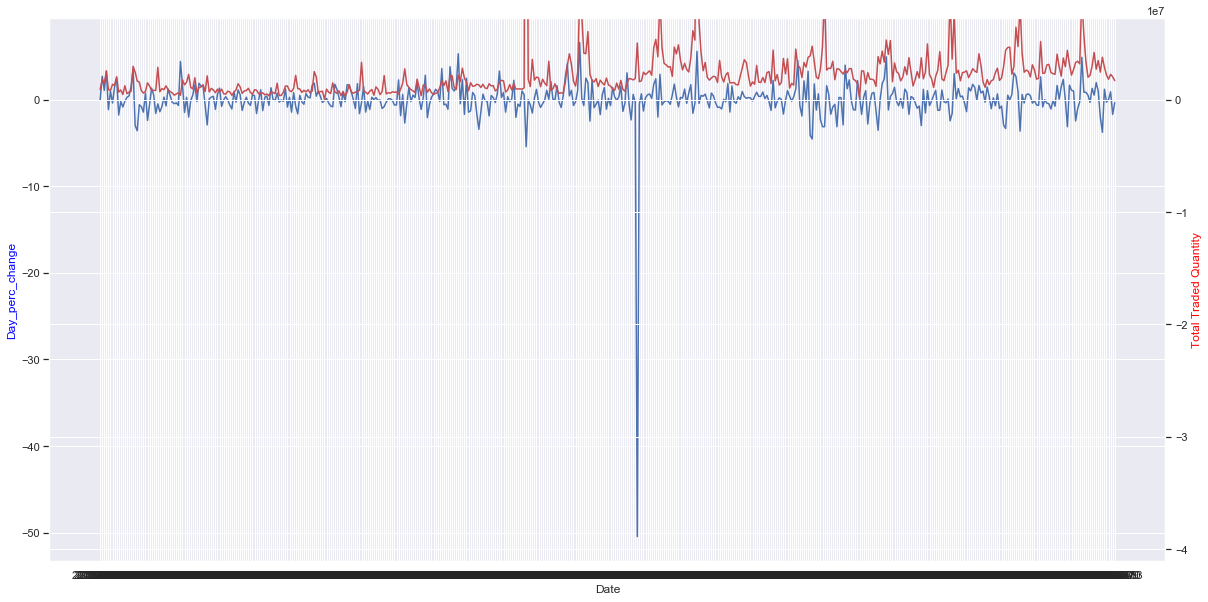

In [11]:
fig = pyplot.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twinx()

ax1.set_xlabel('Date')
ax2.set_ylabel('Total Traded Quantity', color='red')
ax2.plot(df['Total Traded Quantity'], 'r-')

ax1.plot(df['Day_perc_change'], 'b-')
ax1.set_ylabel('Day_perc_change', color='blue')

def align_yaxis(ax1, v1, ax2, v2):
    """adjust ax2 ylimit so that v2 in ax2 is aligned to v1 in ax1"""
    _, y1 = ax1.transData.transform((0, v1))
    _, y2 = ax2.transData.transform((0, v2))
    inv = ax2.transData.inverted()
    _, dy = inv.transform((0, 0)) - inv.transform((0, y1-y2))
    miny, maxy = ax2.get_ylim()
    ax2.set_ylim(miny+dy, maxy+dy)
    
align_yaxis(ax1, 0, ax2, 0)

In [12]:
df2=df[['Trend','Day_perc_change','Total Traded Quantity']]

In [13]:
df3=df2.groupby(['Trend']).mean()
df3

,Day_perc_change,Total Traded Quantity
Trend,,
Among top gainers,4.158269,4.537488e+06
Among top losers,-3.770018,8.484349e+06
Bear drop,-50.455309,5.049371e+06
Bull run,0.066460,3.198651e+06
Slight negative,-0.719736,1.637151e+06
Slight or No change,0.022601,1.589814e+06
Slight positive,0.713344,1.545682e+06
negative,-1.635251,1.909711e+06
positive,1.637845,2.152077e+06


In [14]:
df3['Trend']=df3.index

In [15]:
df3

,Day_perc_change,Total Traded Quantity,Trend
Trend,,,
Among top gainers,4.158269,4.537488e+06,Among top gainers
Among top losers,-3.770018,8.484349e+06,Among top losers
Bear drop,-50.455309,5.049371e+06,Bear drop
Bull run,0.066460,3.198651e+06,Bull run
Slight negative,-0.719736,1.637151e+06,Slight negative
Slight or No change,0.022601,1.589814e+06,Slight or No change
Slight positive,0.713344,1.545682e+06,Slight positive
negative,-1.635251,1.909711e+06,negative
positive,1.637845,2.152077e+06,positive


### 

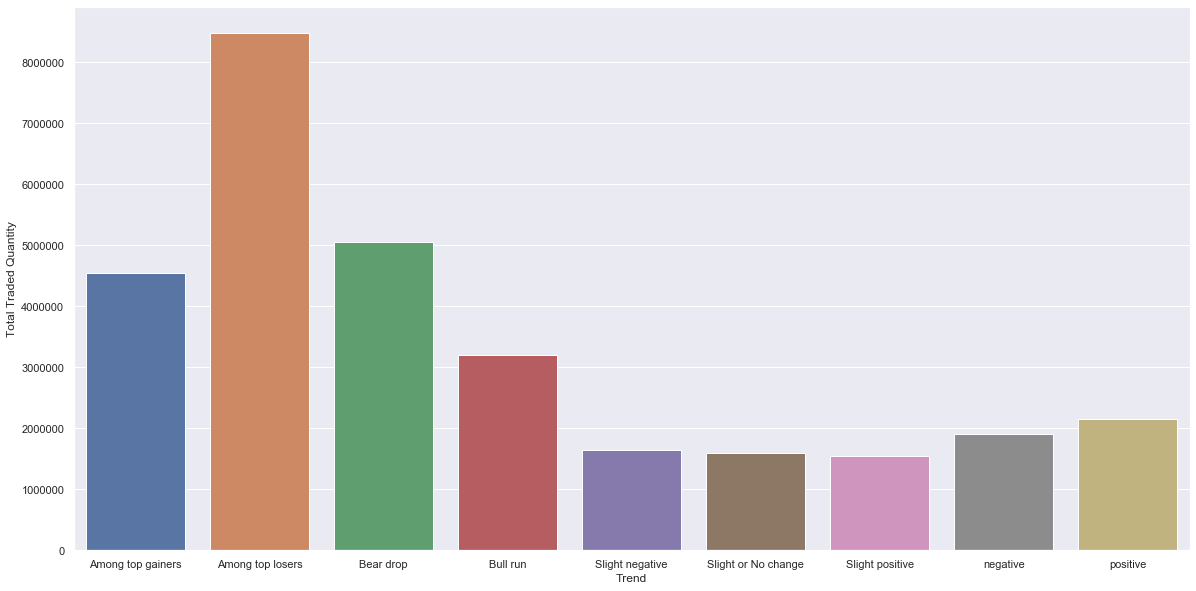

In [16]:
sns.barplot(x=df3['Trend'],y=df3['Total Traded Quantity'])

In [197]:
df3=df2.groupby(['Trend']).median()

In [198]:
df3

,Day_perc_change,Total Traded Quantity
Trend,,
Among top gainers,3.905472,2791421.5
Among top losers,-3.527219,3902322.0
Bear drop,-50.455309,5049371.0
Bull run,0.020911,2850001.5
Slight negative,-0.707508,1382150.0
Slight or No change,0.022383,1302544.0
Slight positive,0.700491,1476382.5
negative,-1.497724,1603040.5
positive,1.561942,1768752.0


In [17]:
df3['Trend']=df3.index

In [18]:
df3

,Day_perc_change,Total Traded Quantity,Trend
Trend,,,
Among top gainers,4.158269,4.537488e+06,Among top gainers
Among top losers,-3.770018,8.484349e+06,Among top losers
Bear drop,-50.455309,5.049371e+06,Bear drop
Bull run,0.066460,3.198651e+06,Bull run
Slight negative,-0.719736,1.637151e+06,Slight negative
Slight or No change,0.022601,1.589814e+06,Slight or No change
Slight positive,0.713344,1.545682e+06,Slight positive
negative,-1.635251,1.909711e+06,negative
positive,1.637845,2.152077e+06,positive


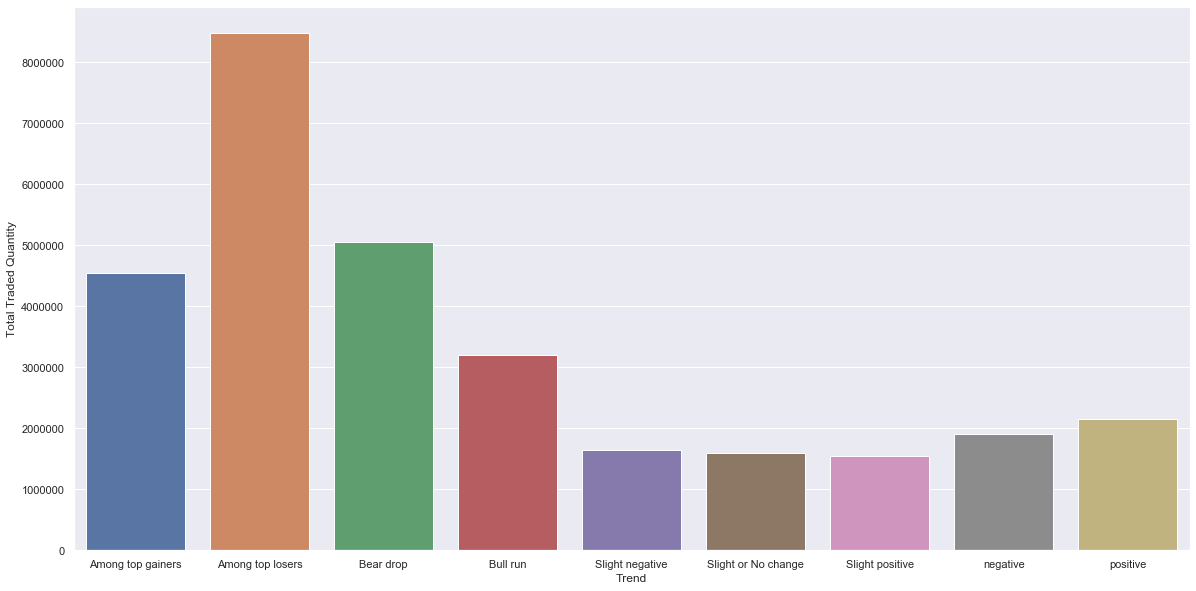

In [19]:

sns.barplot(x=df3['Trend'],y=df3['Total Traded Quantity'])

In [20]:
# we replace all the NAN values of Trend with Bull run

trend_aggregation=df.groupby('Trend').count()['Day_perc_change']
trend_aggregation

Trend
Among top gainers       16
Among top losers         9
Bear drop                1
Bull run                60
Slight negative         48
Slight or No change    163
Slight positive         44
negative                68
positive                85
Name: Day_perc_change, dtype: int64

In [21]:
trend_aggregation.index

Index(['Among top gainers', 'Among top losers', 'Bear drop', 'Bull run',
       'Slight negative', 'Slight or No change', 'Slight positive', 'negative',
       'positive'],
      dtype='object', name='Trend')

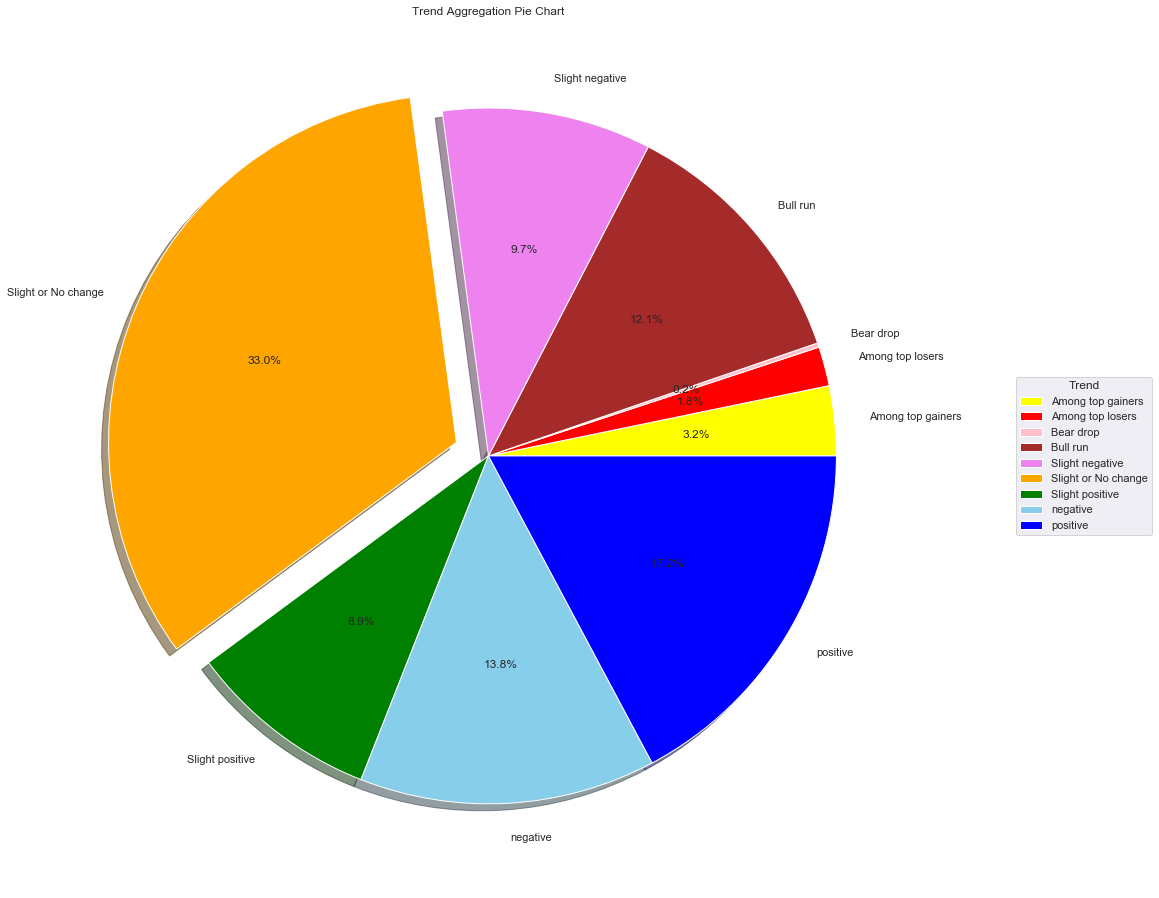

In [22]:
fig, ax = pyplot.subplots(figsize=(16, 16), subplot_kw=dict(aspect="equal"))
explode = (0,0,0,0,0,0.1,0,0,0)
colors=['yellow','red','pink','brown','violet','orange','green','skyblue','blue']
ax.pie( trend_aggregation,explode=explode,labels=trend_aggregation.index, autopct='%1.1f%%',shadow=True,colors=colors)

ax.set_title("Trend Aggregation Pie Chart")
ax.legend(trend_aggregation.index,
          title="Trend",
          loc="center left",
          bbox_to_anchor=(1.1, 0, 0.5, 1))

pyplot.show()

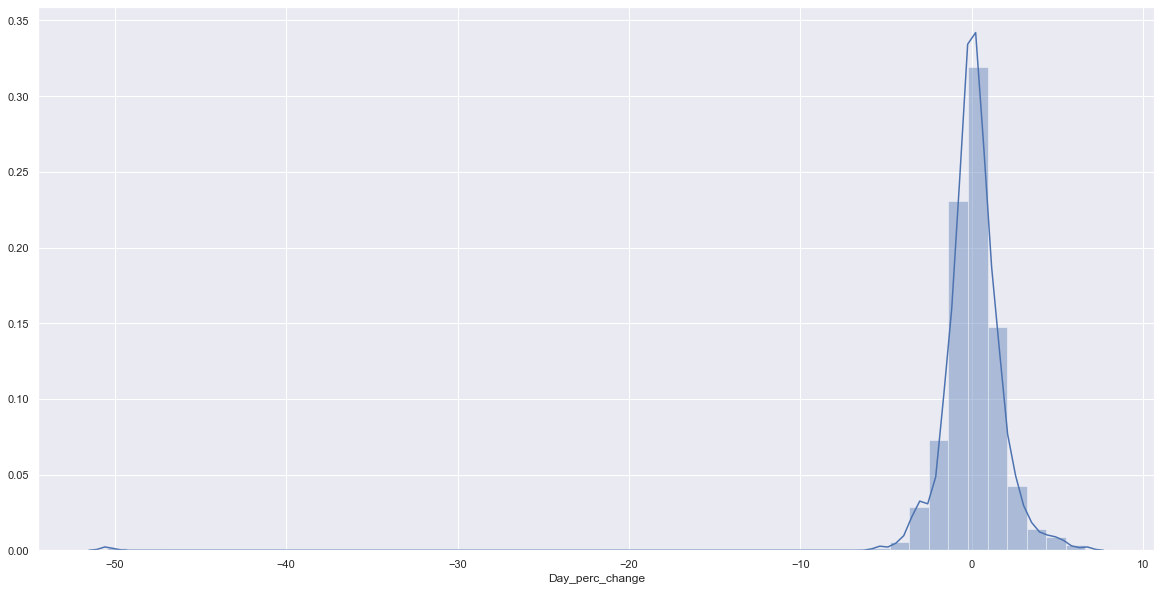

In [23]:
sns.distplot(df['Day_perc_change'])


In [120]:
# to load the any 5 data from the large_cap companies zip file
dataf1=pd.read_csv("C:/Users/JAYANK/Desktop/aspiration ai internship/large cap/TITAN.csv")
dataf2=pd.read_csv("C:/Users/JAYANK/Desktop/aspiration ai internship/large cap/TCS.csv")
dataf3=pd.read_csv("C:/Users/JAYANK/Desktop/aspiration ai internship/large cap/SUNPHARMA.csv")
dataf4=pd.read_csv("C:/Users/JAYANK/Desktop/aspiration ai internship/large cap/RELIANCE.csv")
dataf5=pd.read_csv("C:/Users/JAYANK/Desktop/aspiration ai internship/large cap/MARUTI.csv")

In [121]:
# filter the data where series=='EQ'
dataf1=dataf1[dataf1['Series']=='EQ']
dataf2=dataf2[dataf2['Series']=='EQ']
dataf3=dataf3[dataf3['Series']=='EQ']
dataf4=dataf4[dataf4['Series']=='EQ']
dataf5=dataf5[dataf5['Series']=='EQ']

In [122]:
#set the index of the dataframe is date
dataf1.set_index('Date',inplace=True)

dataf2.set_index('Date',inplace=True)
dataf3.set_index('Date',inplace=True)
dataf4.set_index('Date',inplace=True)
dataf5.set_index('Date',inplace=True)

In [123]:
# change the dataframe to contain only close price if you want to create another then create
dataf1=dataf1['Close Price']
dataf2=dataf2['Close Price']
dataf3=dataf3['Close Price']
dataf4=dataf4['Close Price']
dataf5=dataf5['Close Price']

In [28]:
# create a new dataframe where columns name is the companies name
new_dataframe=pd.DataFrame(columns=['TITAN','TCS','SUNPHARMA','RELIANCE','MARUTI'])

In [29]:
# load the data of the dataframe column wise or companies wise
new_dataframe['TITAN']=dataf1
new_dataframe['TCS']=dataf2
new_dataframe['SUNPHARMA']=dataf3
new_dataframe['RELIANCE']=dataf4
new_dataframe['MARUTI']=dataf5

In [30]:
# drop na values
new_dataframe.dropna(axis=0,inplace=True)

In [56]:
new_dataframe

,TITAN,TCS,SUNPHARMA,RELIANCE,MARUTI
Date,,,,,
15-May-2017,483.65,2365.10,654.45,1344.10,6823.90
16-May-2017,488.30,2429.15,652.35,1356.30,6953.95
17-May-2017,481.75,2455.35,650.90,1353.10,6958.20
18-May-2017,471.65,2536.20,653.95,1327.35,6831.05
19-May-2017,471.15,2507.15,653.15,1318.85,6790.55
...,...,...,...,...,...
07-May-2019,1086.50,2151.95,448.20,1343.50,6702.00
08-May-2019,1088.70,2152.85,439.15,1299.45,6650.15
09-May-2019,1104.45,2172.55,439.35,1256.45,6624.95


In [32]:
new_dataframe.head()

,TITAN,TCS,SUNPHARMA,RELIANCE,MARUTI
Date,,,,,
15-May-2017,483.65,2365.10,654.45,1344.10,6823.90
16-May-2017,488.30,2429.15,652.35,1356.30,6953.95
17-May-2017,481.75,2455.35,650.90,1353.10,6958.20
18-May-2017,471.65,2536.20,653.95,1327.35,6831.05
19-May-2017,471.15,2507.15,653.15,1318.85,6790.55


In [57]:
new_dataframe_pct_change=new_dataframe.pct_change()

In [58]:

new_dataframe_pct_change.dropna(axis=0,inplace=True)

In [59]:
new_dataframe_pct_change

,TITAN,TCS,SUNPHARMA,RELIANCE,MARUTI
Date,,,,,
16-May-2017,0.009614,0.027081,-0.003209,0.009077,0.019058
17-May-2017,-0.013414,0.010786,-0.002223,-0.002359,0.000611
18-May-2017,-0.020965,0.032928,0.004686,-0.019030,-0.018273
19-May-2017,-0.001060,-0.011454,-0.001223,-0.006404,-0.005929
22-May-2017,0.021755,0.009652,-0.019904,0.004019,-0.013084
...,...,...,...,...,...
07-May-2019,0.003371,-0.002734,-0.010924,-0.029894,-0.001140
08-May-2019,0.002025,0.000418,-0.020192,-0.032787,-0.007736
09-May-2019,0.014467,0.009151,0.000455,-0.033091,-0.003789


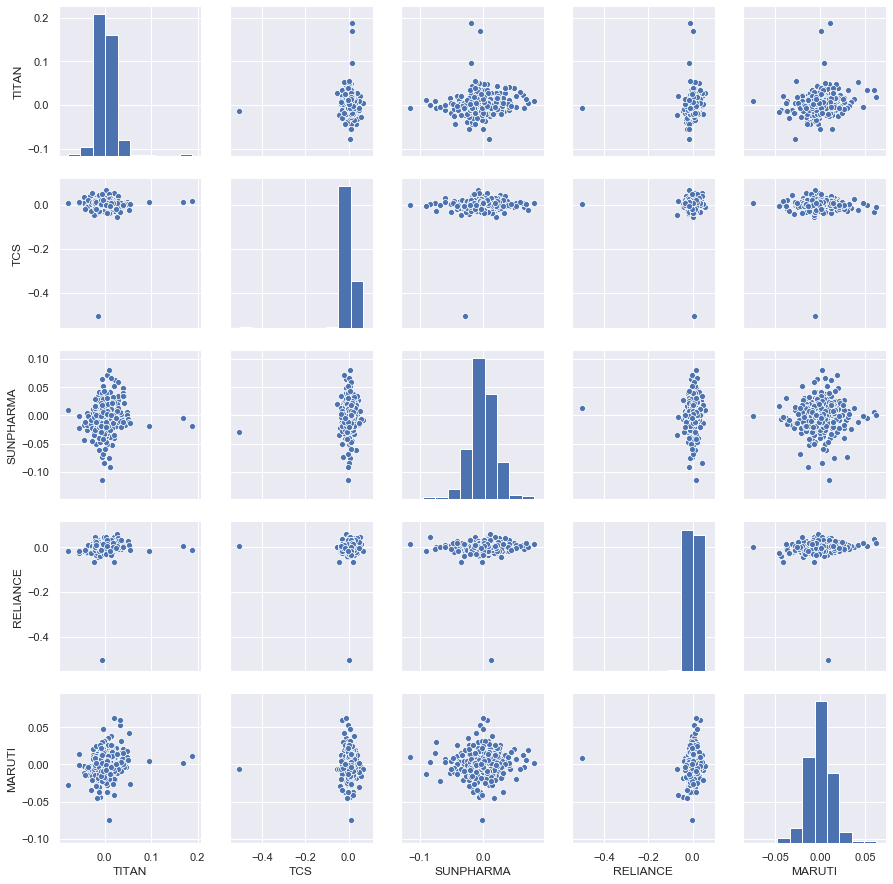

In [36]:
# to create a pairplot of new_dataframe_pct_change dataframe
sns.pairplot(new_dataframe_pct_change)

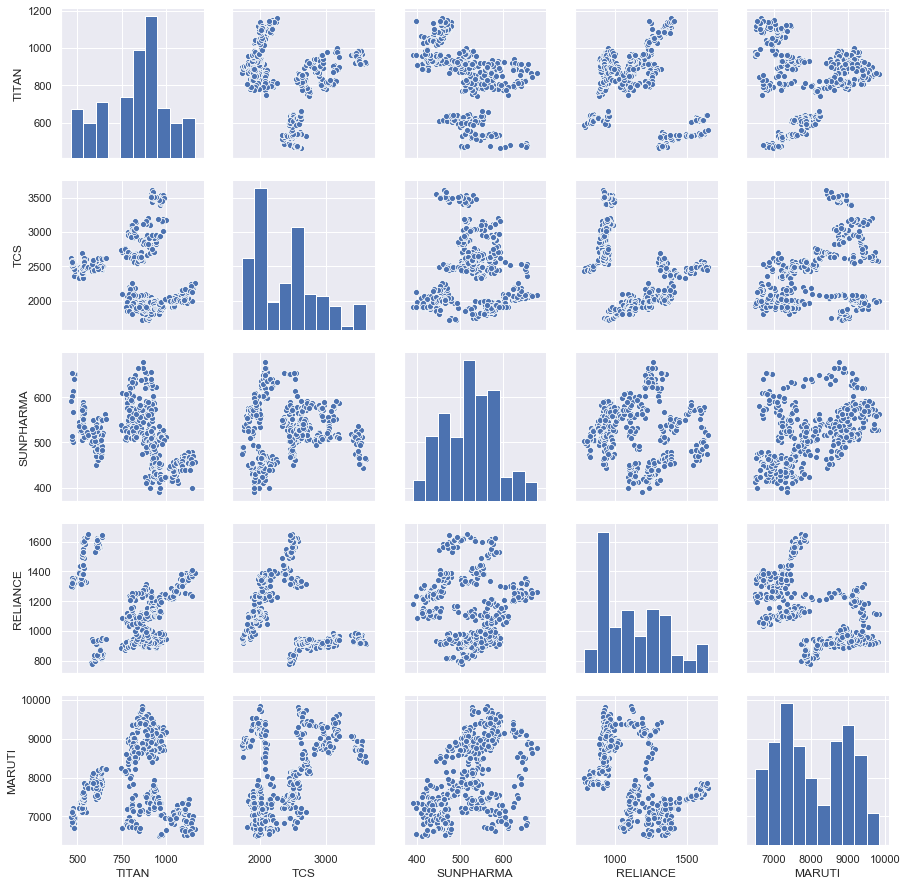

In [37]:
# to create a pairplot of new_dataframe
sns.pairplot(new_dataframe)

In [38]:
correlation_volatility=new_dataframe_pct_change.rolling(7).std()

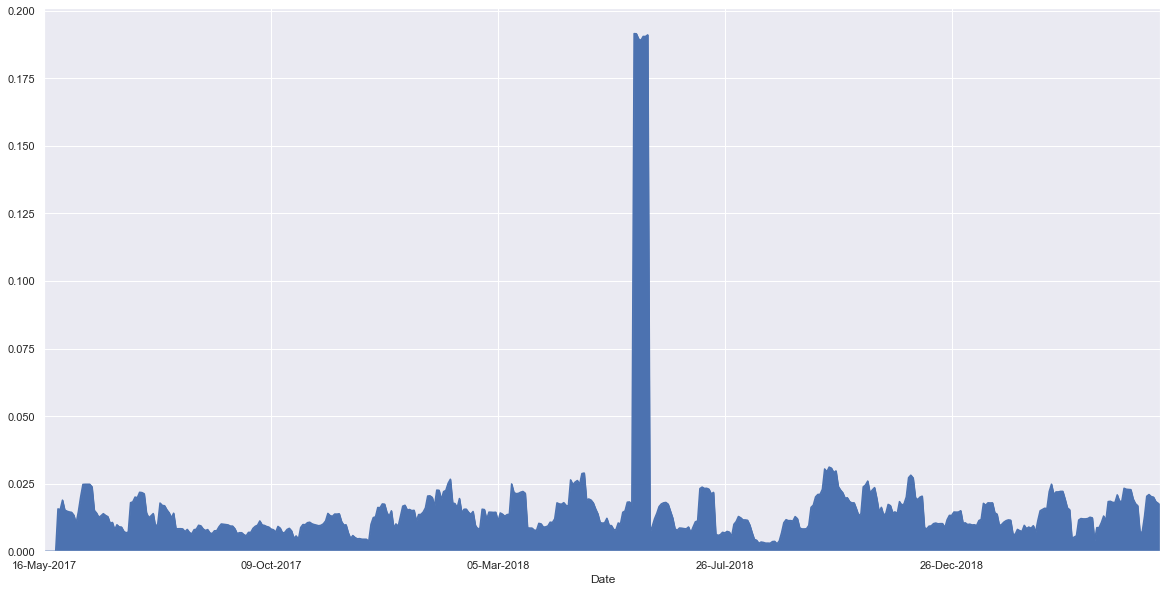

In [39]:
# for TCS stocks
correlation_volatility['TCS'].plot(kind='area')

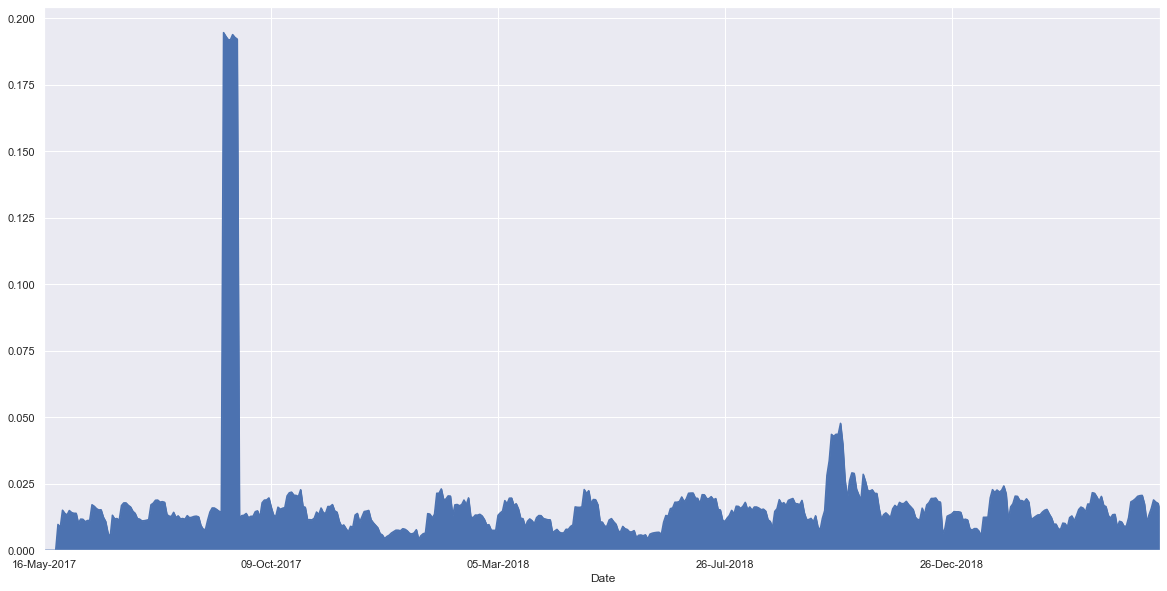

In [40]:
# for Reliance stocks
correlation_volatility['RELIANCE'].plot(kind='area')

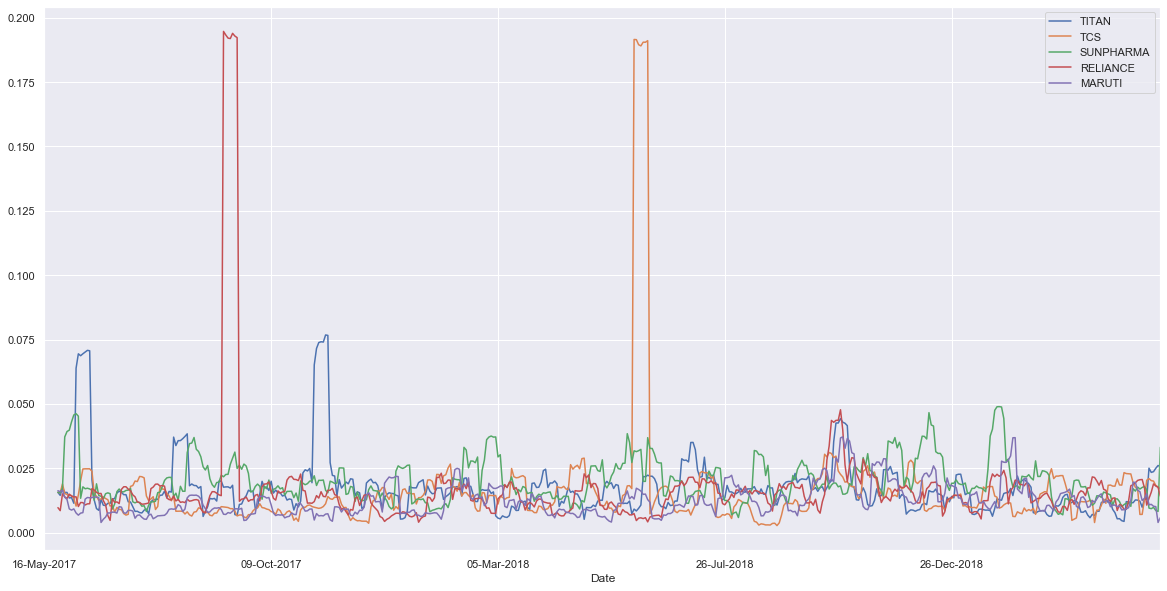

In [42]:
# for all 5 stocks stocks
correlation_volatility.plot(kind='line')

In [133]:
niftydataframe=pd.read_csv("C:/Users/JAYANK/Desktop/aspiration ai internship/Nifty50.csv")

In [134]:
niftydataframe.set_index('Date',inplace=True)

In [135]:
my_frame=pd.DataFrame()

In [137]:
my_frame['TITAN']=dataf1
my_frame['TCS']=dataf2
my_frame['Nifty']=niftydataframe['Close']

In [140]:
my_frame1=my_frame.pct_change().rolling(7).std()

In [142]:
my_frame1.dropna(axis=0,inplace=True)

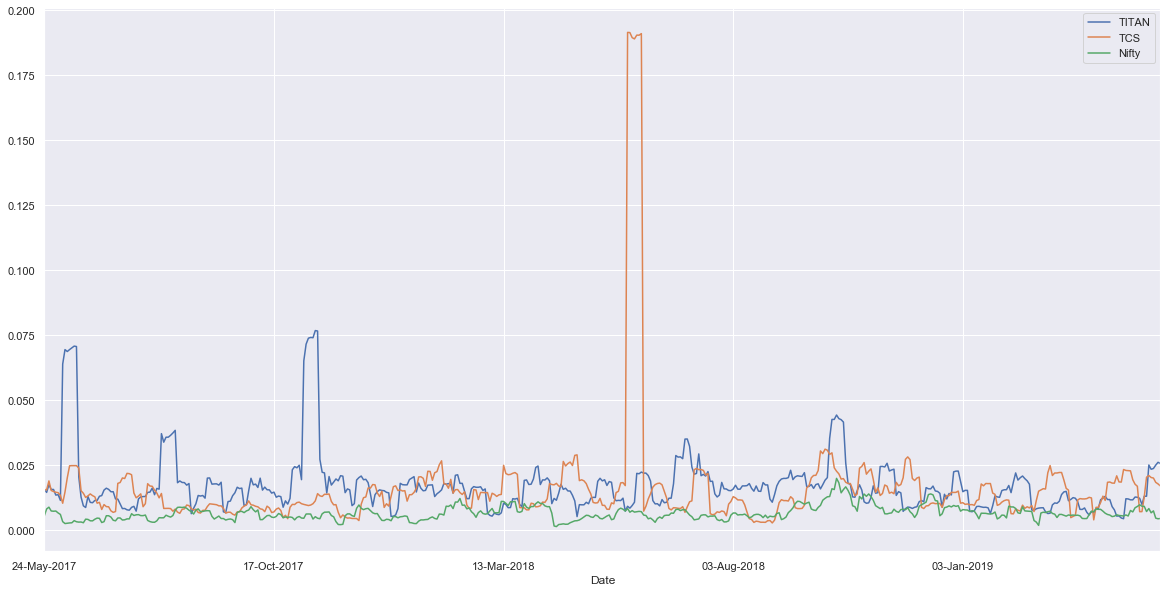

In [147]:
my_frame1.plot(kind='line')

In [148]:
df['Close_price']=df1['Close Price']

In [149]:
df

,Unnamed: 0,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,...,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,month,year,Closeprice*TotalTradedQuantity,Day_perc_change,Trend,Close_price
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-15,0,TCS,EQ,2017-05-15,2360.65,2375.10,2377.95,2341.60,2368.00,2365.10,...,2.138043e+09,30047,712450,78.39,5,2017,2.149408e+09,0.000000,Slight or No change,2365.10
2017-05-16,1,TCS,EQ,2017-05-16,2365.10,2380.00,2435.00,2373.45,2425.10,2429.15,...,4.339703e+09,58476,1167534,64.84,5,2017,4.373716e+09,2.708131,positive,2429.15
2017-05-17,2,TCS,EQ,2017-05-17,2429.15,2433.50,2460.75,2423.00,2450.00,2455.35,...,3.513729e+09,86412,1031752,71.74,5,2017,3.531036e+09,1.078567,positive,2455.35
2017-05-18,3,TCS,EQ,2017-05-18,2455.35,2450.00,2572.00,2442.25,2525.00,2536.20,...,6.489478e+09,111566,1135613,44.20,5,2017,6.516251e+09,3.292810,Among top gainers,2536.20
2017-05-19,4,TCS,EQ,2017-05-19,2536.20,2536.20,2540.55,2486.00,2503.85,2507.15,...,2.238430e+09,63112,517461,57.94,5,2017,2.238940e+09,-1.145414,negative,2507.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,493,TCS,EQ,2019-05-07,2157.85,2160.05,2184.35,2138.80,2154.00,2151.95,...,4.763441e+09,86096,975603,44.31,5,2019,4.737944e+09,-0.273420,Bull run,2151.95
2019-05-08,494,TCS,EQ,2019-05-08,2151.95,2151.00,2168.00,2130.40,2156.00,2152.85,...,3.926902e+09,77713,781526,42.83,5,2019,3.928725e+09,0.041823,Bull run,2152.85
2019-05-09,495,TCS,EQ,2019-05-09,2152.85,2145.00,2184.10,2136.10,2171.20,2172.55,...,4.906405e+09,106297,1251459,55.27,5,2019,4.919005e+09,0.915066,Bull run,2172.55


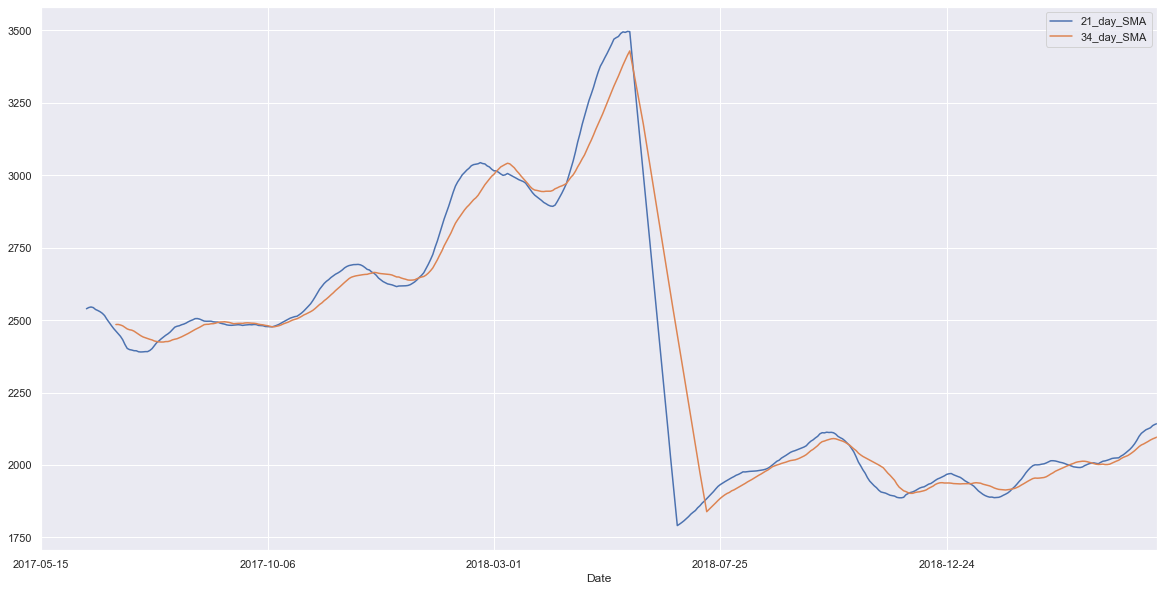

In [150]:

df["21_day_SMA"] = df.Close_price.rolling(21).mean()
df["34_day_SMA"] = df.Close_price.rolling(34).mean()
df[["21_day_SMA", "34_day_SMA"]].plot()

In [151]:
df

,Unnamed: 0,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,...,Deliverable Qty,% Dly Qt to Traded Qty,month,year,Closeprice*TotalTradedQuantity,Day_perc_change,Trend,Close_price,21_day_SMA,34_day_SMA
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-15,0,TCS,EQ,2017-05-15,2360.65,2375.10,2377.95,2341.60,2368.00,2365.10,...,712450,78.39,5,2017,2.149408e+09,0.000000,Slight or No change,2365.10,NaN,NaN
2017-05-16,1,TCS,EQ,2017-05-16,2365.10,2380.00,2435.00,2373.45,2425.10,2429.15,...,1167534,64.84,5,2017,4.373716e+09,2.708131,positive,2429.15,NaN,NaN
2017-05-17,2,TCS,EQ,2017-05-17,2429.15,2433.50,2460.75,2423.00,2450.00,2455.35,...,1031752,71.74,5,2017,3.531036e+09,1.078567,positive,2455.35,NaN,NaN
2017-05-18,3,TCS,EQ,2017-05-18,2455.35,2450.00,2572.00,2442.25,2525.00,2536.20,...,1135613,44.20,5,2017,6.516251e+09,3.292810,Among top gainers,2536.20,NaN,NaN
2017-05-19,4,TCS,EQ,2017-05-19,2536.20,2536.20,2540.55,2486.00,2503.85,2507.15,...,517461,57.94,5,2017,2.238940e+09,-1.145414,negative,2507.15,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,493,TCS,EQ,2019-05-07,2157.85,2160.05,2184.35,2138.80,2154.00,2151.95,...,975603,44.31,5,2019,4.737944e+09,-0.273420,Bull run,2151.95,2124.990476,2081.357353
2019-05-08,494,TCS,EQ,2019-05-08,2151.95,2151.00,2168.00,2130.40,2156.00,2152.85,...,781526,42.83,5,2019,3.928725e+09,0.041823,Bull run,2152.85,2128.492857,2086.223529
2019-05-09,495,TCS,EQ,2019-05-09,2152.85,2145.00,2184.10,2136.10,2171.20,2172.55,...,1251459,55.27,5,2019,4.919005e+09,0.915066,Bull run,2172.55,2136.019048,2090.123529


In [254]:
prev_index       = df.index[0]
prev_row         = df[:prev_index]
short_sma_higher = prev_row["21_day_SMA"][0] > prev_row["34_day_SMA"][0]

for index, row in df.iterrows():
    if row["21_day_SMA"] and row["34_day_SMA"]:    
        if short_sma_higher       and row["21_day_SMA"] < row["34_day_SMA"]:
            result = "SELL"
        elif not short_sma_higher and row["21_day_SMA"] > row["34_day_SMA"]:
            result = "BUY"
        else:
            result = "HODL" 
        df.at[index, 'Trade_Call'] = result
        short_sma_higher = row["21_day_SMA"] > row["34_day_SMA"]                        
    
signals = df[["Close_price", "21_day_SMA", "34_day_SMA", "Trade_Call"]][ df['Trade_Call'] != "HODL" ]
signals


,Close_price,21_day_SMA,34_day_SMA,Trade_Call
Date,,,,
2017-07-27,2481.70,2428.323810,2425.120588,BUY
2017-09-06,2453.20,2489.945238,2493.472059,SELL
2017-10-11,2500.35,2479.214286,2477.175000,BUY
2017-12-13,2628.40,2662.069048,2664.892647,SELL
2018-01-11,2790.50,2647.559524,2646.360294,BUY
2018-03-06,3042.80,3010.721429,3020.742647,SELL
2018-04-20,3402.45,2996.919048,2982.477941,BUY
2018-06-01,1732.45,3328.928571,3346.585294,SELL
2018-07-17,2002.15,1883.923810,1838.869118,BUY


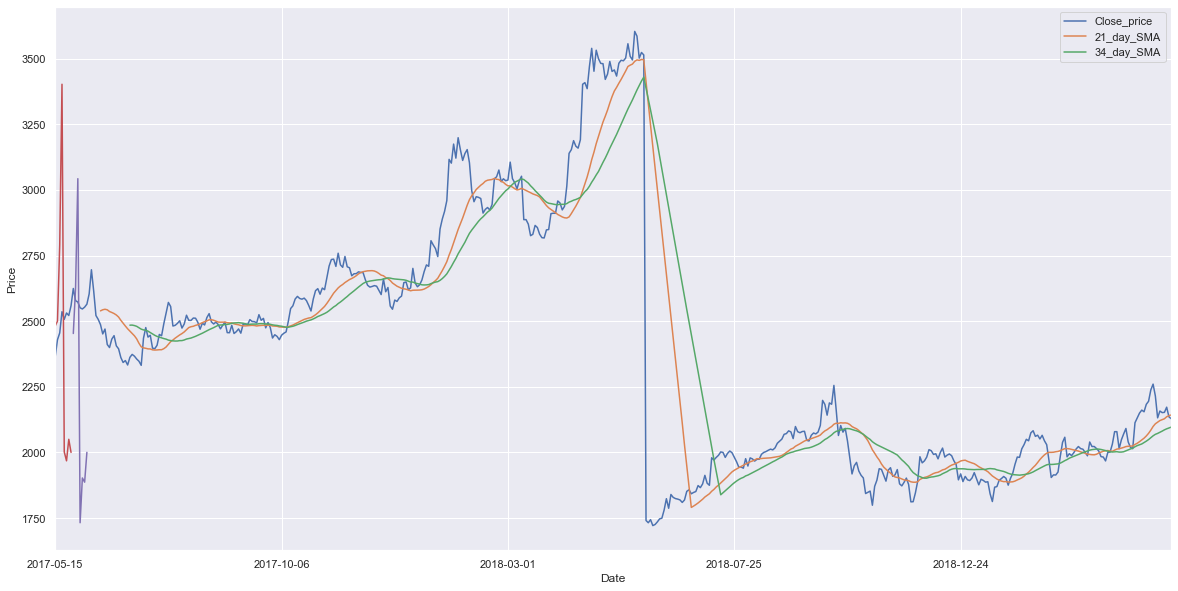

In [255]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111, ylabel="Price")

df[["Close_price", "21_day_SMA", "34_day_SMA"]].plot(ax=ax1)

ax1.plot( df["Close_price"][ df['Trade_Call'] == 'BUY' ].index, 
          df["Close_price"][ df['Trade_Call'] == 'BUY' ])

ax1.plot( df["Close_price"][ df['Trade_Call'] == 'SELL' ].index, 
          df["Close_price"][ df['Trade_Call'] == 'SELL' ])

In [256]:
df

,Unnamed: 0,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,...,% Dly Qt to Traded Qty,month,year,Closeprice*TotalTradedQuantity,Day_perc_change,Trend,Close_price,21_day_SMA,34_day_SMA,Trade_Call
Date,,,,,,,,,,,,,,,,,,,,,
2017-05-15,0,TCS,EQ,2017-05-15,2360.65,2375.10,2377.95,2341.60,2368.00,2365.10,...,78.39,5,2017,2.149408e+09,0.000000,Slight or No change,2365.10,NaN,NaN,HODL
2017-05-16,1,TCS,EQ,2017-05-16,2365.10,2380.00,2435.00,2373.45,2425.10,2429.15,...,64.84,5,2017,4.373716e+09,2.708131,positive,2429.15,NaN,NaN,HODL
2017-05-17,2,TCS,EQ,2017-05-17,2429.15,2433.50,2460.75,2423.00,2450.00,2455.35,...,71.74,5,2017,3.531036e+09,1.078567,positive,2455.35,NaN,NaN,HODL
2017-05-18,3,TCS,EQ,2017-05-18,2455.35,2450.00,2572.00,2442.25,2525.00,2536.20,...,44.20,5,2017,6.516251e+09,3.292810,Among top gainers,2536.20,NaN,NaN,HODL
2017-05-19,4,TCS,EQ,2017-05-19,2536.20,2536.20,2540.55,2486.00,2503.85,2507.15,...,57.94,5,2017,2.238940e+09,-1.145414,negative,2507.15,NaN,NaN,HODL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,493,TCS,EQ,2019-05-07,2157.85,2160.05,2184.35,2138.80,2154.00,2151.95,...,44.31,5,2019,4.737944e+09,-0.273420,Bull run,2151.95,2124.990476,2081.357353,HODL
2019-05-08,494,TCS,EQ,2019-05-08,2151.95,2151.00,2168.00,2130.40,2156.00,2152.85,...,42.83,5,2019,3.928725e+09,0.041823,Bull run,2152.85,2128.492857,2086.223529,HODL
2019-05-09,495,TCS,EQ,2019-05-09,2152.85,2145.00,2184.10,2136.10,2171.20,2172.55,...,55.27,5,2019,4.919005e+09,0.915066,Bull run,2172.55,2136.019048,2090.123529,HODL


In [257]:
df['14days_sme']=df.Close_price.rolling(14).mean()
df['14days_std']=df.Close_price.rolling(14).std()
df['14days_bollinger_upper']=df['14days_sme']+df['14days_std']*2
df['14days_bollinger_lower']=df['14days_sme']-df['14days_std']*2

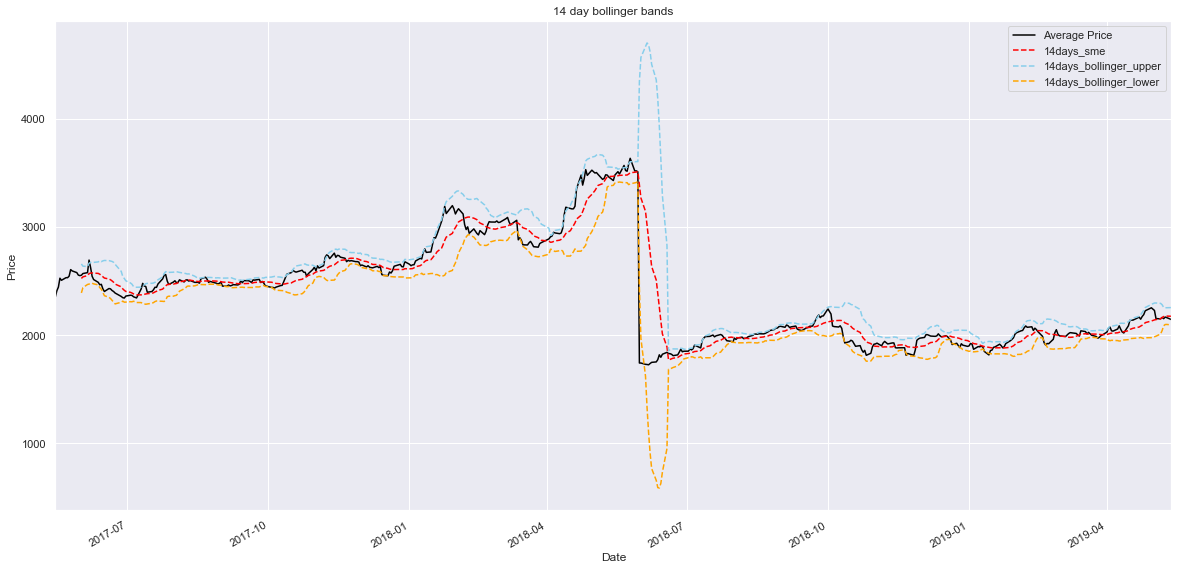

In [258]:
ax = plt.gca()
df.plot(kind='line',x='Date', y='Average Price', ax=ax, color='black')
df.plot(kind='line',x='Date', y='14days_sme',    ax=ax, color='red', linestyle='--')
df.plot(kind='line',x='Date', y='14days_bollinger_upper',    ax=ax, color='skyblue', linestyle='--')
df.plot(kind='line',x='Date', y='14days_bollinger_lower',    ax=ax, color='orange', linestyle='--')
plt.title("14 day bollinger bands")
plt.ylabel("Price")
plt.show()

In [262]:
df.to_csv('week3.csv')

In [8]:
a=pd.DataFrame([5,6,7,8,9,10,11,12,13])
b=a.rolling(5).mean()

In [10]:
b.values

array([[nan],
       [nan],
       [nan],
       [nan],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.]])